In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seatease as sb

In [2]:
# Lists available devices
sb.spectrometers.list_devices()

[<SeaTeaseDevice: 1>]

In [3]:
# Load first device
spec = sb.spectrometers.Spectrometer.from_first_available()
print(spec)

<Spectralmeter USB2000-esk:1>


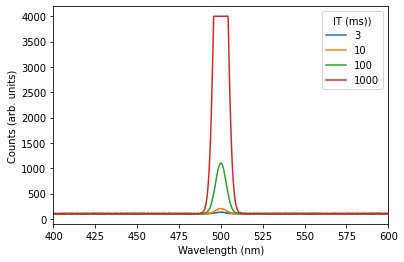

In [4]:
# Using frontend API
plt.figure()
for it in [3*1000,10*1000,100*1000,1000*1000]:
    spec.integration_time_micros(it)
    plt.plot(spec.wavelengths(),spec.intensities(),label=it//1000)
plt.xlim(400,600)
plt.xlabel(r"Wavelength (nm)")
plt.ylabel(r"Counts (arb. units)")
plt.legend(title=r"IT (ms))")
plt.show()

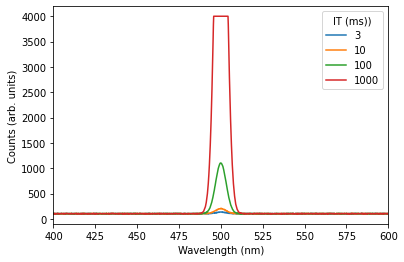

In [5]:
# Using .f functionality
plt.figure()
for it in [3*1000,10*1000,100*1000,1000*1000]:
    spec.f.spectrometer.set_integration_time_micros(it)
    plt.plot(spec.f.spectrometer.get_wavelengths(),
             spec.f.spectrometer.get_intensities(),
             label=it//1000)
plt.xlim(400,600)
plt.xlabel(r"Wavelength (nm)")
plt.ylabel(r"Counts (arb. units)")
plt.legend(title=r"IT (ms))")
plt.show()

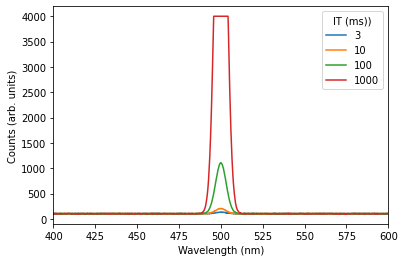

In [6]:
# Using .features functionality
plt.figure()
for it in [3*1000,10*1000,100*1000,1000*1000]:
    spec.features["spectrometer"][0].set_integration_time_micros(it)
    plt.plot(spec.features["spectrometer"][0].get_wavelengths(),
             spec.features["spectrometer"][0].get_intensities(),
             label=it//1000)
plt.xlim(400,600)
plt.xlabel(r"Wavelength (nm)")
plt.ylabel(r"Counts (arb. units)")
plt.legend(title=r"IT (ms))")
plt.show()

In [7]:
# Raises SeaTeaseError, no unopened device
spec2 = sb.spectrometers.Spectrometer.from_first_available()

SeaTeaseError: No unopened device found.

In [8]:
# Closes and reopens device
spec.close()
spec = sb.spectrometers.Spectrometer.from_first_available()